# La simulation *pas à pas*

Nous ne verrons ici que le début du sujet car il faudrait bien plus de temps pour aborder ce domaine. Vous le ferez surement dans le futur.

Reprenons le dernier exercice comme exemple :

*Un avions lâche une caisse de matériel d'une altitude $H$ et une vitesse initiale horizontale $\vec{v_0}$. Nous allons étudier la trajetoire de la caisse.*

<img src="http://lappweb.in2p3.fr/~maurin/expl201/largage.png" alt="drawing" width="400"/>

*On prendra $H=10000\,$m, $g=9.81\,$m.s$^{-2}$ et $v_0=100\,$m.s$^{-1}$*


Le code ci-dessous affiche les données du fichier *chute.bin* avec quelques petits cosmétiques supplémentaires. 

In [26]:
# Ici on charge les données
import pickle

fichier = open("fichiers/chute.bin","rb")

data_x = pickle.load(fichier)
data_z = pickle.load(fichier)

fichier.close()


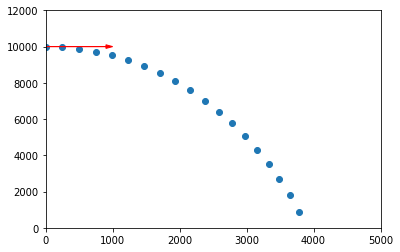

In [28]:
# Ici on affiche les données
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 
ax.set_xlim((0, 5000))
ax.set_ylim((0, 12000))
#ax.set_aspect('equal') # Permet de faire que l'echelle des x et des z soient les mêmes

plt.arrow(0, 10000, 1000, 0, head_width=200.00, head_length=100.0, fc='r', ec='r', length_includes_head = True)

plt.scatter(data_x,data_z)
plt.show()

La flèche représente visuellement la vitesse initiale.

-----

Faire une **simulation**, c’est calculer et représenter les différents états successifs de l’évolution d’un modèle (représentant un système physique ou biologique ou ...) au cours du temps. 

Nous allons ainsi partir d'un état initial et faire avancer le temps par petit *pas* ($\delta t$) en faisant un certain nombre d'hypothèses et de calculs.

Pour notre situation, nous avons déjà l'état initial :

- $t=0$
- $x(0) = 0$
- $z(0) = H$
- $v_x(0) = v_0$
- $v_z(0) = 0$
- $a_x(0) = 0$
- $a_z(0) = -g$

Il faut maintenant trouver le moyen de faire *"avancer le temps"*. Mais comment ? 

**Grâce au développement de Taylor !!!!** 

En effet, si nous prenons $\delta t$ très petit, on peut écrire à l'ordre 1 que :

<div align="center">  $f(t+\delta t) = f(t) + \frac{df(t)}{dt}\,\delta t$ </div>

Appliquer à $x(t)$ cela donne : 

<div align="center"> $x(t+\delta t) = x(t) + \frac{dx(t)}{dt}\,\delta t = x(t) + v_x(t)\,\delta t$ </div>

Appliquer à $v_x(t)$ cela donne :
<div align="center"> $v_x(t+\delta t) = v_x(t) + \frac{dv_x(t)}{dt}\,\delta t = v_x(t) + a_x(t)\,\delta t$ </div>

____

Appliquons cela à $t=0$ pour calculer la position $x$ et $v_x$ au temps $\delta t$ :
<div align="center"> $x(\delta t) = x(0) + v_x(0)\,\delta t$ </div>
<div align="center"> $v_x(\delta t) = v_x(0) + a_x(0)\,\delta t$ </div>



Si vous regardez la situation initiale, nous avons tout ce qu'il faut pour faire ces calculs. Voyons ce que cela donne coté code :

In [50]:
# Les paramètres initiaux :
t = [0] # nous utilisons des listes pour garder tous les temps, positions, vitesses...
x = [0] 
vx = [100]
ax = [0]



# On definit notre pas de temps (nous verrons plus tard son influence):
pas = 0.1


# A nos listes précédentes, nous allons ajouter (append) la valeur après un pas de temps
t.append(t[0] + pas) # le temps a avancé d'un pas
x.append(x[0] + vx[0] * pas) 
vx.append(vx[0] + ax[0] * pas) 
ax.append(0) # dans notre cas, l'accélération selon x est constante.


#Vérifions le résultat :
print("Les positions x : ",x)
print("Les vitesses vx : ",vx)

Les positions x :  [0, 10.0]
Les vitesses vx :  [100, 100.0]


Naturellement, nous n'allons pas calculer la suite à la main. Nous allons utiliser une boucle. A.

## Exercice 1 :  Ecrire la boucle pour faire avancer le temps

1) Reprener le code précédent et placer le dans une boucle pour faire avancer le temps jusqu'à ce que la caisse touche le sol.

2) Ajouter proprement le calcul de $z$, $v_z$ et $a_z$.

3) Afficher la trajectoire ($z$ en fonction de $x$) 

4) Tester différentes valeurs de `pas`